<a href="https://colab.research.google.com/github/karmenatwork/DSIntroductionUNA/blob/main/diabetes_prediction/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# funpymodeling : version Python de biblioteca de funModeling de R para EDA y preparación de datos
!pip install funpymodeling
!pip install seaborn==0.11.2


# Metodologia

Se usará a metodologia CRISP-DM https://es.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining    

![CRISP-DM](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/479px-CRISP-DM_Process_Diagram.png "Diagrama de proceso que muestra la relación entre las diferentes fases de CRISP-DM")

# Comprensión del Negocio

El accidente cerebrovascular es un importante problema de salud pública que conduce a un aumento de la mortalidad. Los factores de riesgo modificables para el accidente cerebrovascular incluyen hipertensión, diabetes, tabaquismo y abuso de alcohol. Entre estos factores de riesgo, la diabetes y la hipertensión van en rápido crecimiento conduciendo a un aumento sustancial de las enfermedades cardiovasculares y los accidentes cerebrovasculares. 

El Dataset, obtenido de Kaggle, incluye data sobre diabetes, hipertension y stroke. 

https://www.kaggle.com/datasets/prosperchuks/health-dataset/code 


| Variable             | Detalle                                                                                                         |
|----------------------|-----------------------------------------------------------------------------------------------------------------|
| Age                  | 1 = 18-24  9=60-64 13= >80                                                                                      |
| Sex                  | 1:masc 0:femenino                                                                                               |
| HighChol             | 0 = no colesterol alto 1 =  colesterol alto                                                                     |
| CholCheck            | 0 = no colesterol check en 5 años  1 = yes cholesterol check en 5 años                                          |
| BMI                  | Índice de masa corporal                                                                                         |
| Smoker               | ¿Ha fumado al menos 100 cigarrillos en toda su vida? [Nota: 5 paquetes = 100 cigarrillos] 0 = no, 1 = sí        |
| HeartDiseaseorAttack | enfermedad coronaria (CHD) o infarto de miocardio (IM) 0 = no, 1 = sí                                           |
| PhysActivity         | Actividad física en los últimos 30 días - sin incluir el trabajo 0 = no, 1 = sí                                 |
| Fruits               | Consumir fruta una o más veces al día 0 = no, 1 = sí                                                            |
| Veggies              | Consumir verduras 1 o más veces al día 0 = no, 1 = sí                                                           |
| HvyAlcoholConsump    | Hombre adulto: más de 14 bebidas por semana. Mujer adulta: más de 7 bebidas por semana. 0 = no, 1 = sí          |
| GenHlth              | ¿Dirías que en general tu salud es: (escala 1-5) 1 = excelente, 2 = muy buena, 3 = buena, 4 = regular, 5 = mala |
| MentHlth             | Escala de días de mala salud mental 1-30 días                                                                   |
| PhysHlth             | Días de enfermedad física o lesión en los últimos 30 días escala 1-30                                           |
| DiffWalk             | ¿Tiene serias dificultades para caminar o subir escaleras? 0 = no, 1 = sí                                       |
| Diabetes             | 0 = no diabetes, 1 = diabetes                                                                                   |
| Hypertension         | 0 = sin hipertensión, 1 = hipertensión                                                                          |
| Stroke               | 0 = no, 1 = yes                                                                                                 |

# Comprensión de Datos (EDA)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from funpymodeling.exploratory import status
from funpymodeling.exploratory import cat_vars, num_vars
from funpymodeling.exploratory import profiling_num
from funpymodeling.exploratory import freq_tbl

In [ ]:
# Leer los datos
# Diabetes.
data_url="../datasets/diabetes_data.csv"
data_url="https://raw.githubusercontent.com/karmenatwork/DSIntroductionUNA/main/datasets/diabetes_data.csv"

# Hypertension
#data_url="../datasets/hypertension_data.csv"

# Stroke
#data_url="../datasets/stroke_data.csv"

df=pd.read_csv(data_url)
#display(df[0:2].T)
#df.head()
df



,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [ ]:
print(status(df)[["variable"]])

                variable
0                    Age
1                    Sex
2               HighChol
3              CholCheck
4                    BMI
5                 Smoker
6   HeartDiseaseorAttack
7           PhysActivity
8                 Fruits
9                Veggies
10     HvyAlcoholConsump
11               GenHlth
12              MentHlth
13              PhysHlth
14              DiffWalk
15                Stroke
16                HighBP
17              Diabetes


### Análisis descriptivo en forma analítica y visual para comprender el conjunto de datos

#### Dimensión del conjunto de datos

In [ ]:
print('La base de datos presenta {} registros y {} variables'.format(df.shape[0], df.shape[1]))

La base de datos presenta 70692 registros y 18 variables


#### Datos faltantes


In [ ]:
# Usando 
df_status=status(df)
df_status


,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Age,0,0.0,0,0.000000,13,float64
1,Sex,0,0.0,38386,0.543003,2,float64
2,HighChol,0,0.0,33529,0.474297,2,float64
3,CholCheck,0,0.0,1749,0.024741,2,float64
4,BMI,0,0.0,0,0.000000,80,float64
5,Smoker,0,0.0,37094,0.524727,2,float64
6,HeartDiseaseorAttack,0,0.0,60243,0.852190,2,float64
7,PhysActivity,0,0.0,20993,0.296964,2,float64
8,Fruits,0,0.0,27443,0.388205,2,float64
9,Veggies,0,0.0,14932,0.211226,2,float64


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,70692.0,8.584055,2.852153,1.0,7.0,9.0,11.0,13.0
Sex,70692.0,0.456997,0.498151,0.0,0.0,0.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0
Veggies,70692.0,0.788774,0.408181,0.0,1.0,1.0,1.0,1.0


In [ ]:
# Elegir el objetivo
objetivo=df.columns[-1]
# Objetivo: Diabetes
objetivo

'Diabetes'

#### Observacion: 
El dataset de "diabetes_data" no tiene valores faltantes y todas sus variables son de tipo numerico, aunque algunas pueden tambien ser tratadas como categoricas porque tienen baja cardinalidad (valores distintos) e incluso se tienen muchas variables binarias. El problema es una clasificacion binaria

In [ ]:
# Como las variables son numericas, convertir en categorias las variables que tengan pocos valores distintos. 
# menor a 12 por ejemplo (12 meses al año)

def numcats(df, excluir=None):
    data = df.copy()
    sts = status(data)[["variable","unique"]]
    #print(sts)
    vars = sts[sts["unique"]<=12]["variable"].tolist()
    #catvars=[]
    #print(vars)
    for num_var in num_vars(data):
        for var in vars:
            if var==num_var and var!=excluir:
                #catvars.append(var)
                data[var]=data[var].astype('category') 
    return data

print(status(df)[["variable","unique"]])
df=numcats(df, objetivo)
df

                variable  unique
0                    Age      13
1                    Sex       2
2               HighChol       2
3              CholCheck       2
4                    BMI      80
5                 Smoker       2
6   HeartDiseaseorAttack       2
7           PhysActivity       2
8                 Fruits       2
9                Veggies       2
10     HvyAlcoholConsump       2
11               GenHlth       5
12              MentHlth      31
13              PhysHlth      31
14              DiffWalk       2
15                Stroke       2
16                HighBP       2
17              Diabetes       2


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [ ]:
df[objetivo].value_counts()

0.0    35346
1.0    35346
Name: Diabetes, dtype: int64

Como se ve el dataset esta balanceando con respecto a la variable objetivo "Diabetes".

In [ ]:
# Definir la lista del objectivo y el dataframe con los predictores
y=df[objetivo].tolist()
X=df.drop(columns=["id",objetivo], errors="ignore")

## Análisis univariado de variables numéricas

In [ ]:
profiling_num(df)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,Age,8.584055,2.852153,0.332262,1.0,3.0,7.0,9.0,11.0,13.0,13.0
1,BMI,29.856985,7.113954,0.238268,19.0,21.0,25.0,29.0,33.0,43.0,52.0
2,MentHlth,3.752037,8.155627,2.173653,0.0,0.0,0.0,0.0,2.0,30.0,30.0
3,PhysHlth,5.810417,10.062261,1.731762,0.0,0.0,0.0,0.0,6.0,30.0,30.0
4,Diabetes,0.500000,0.500004,1.000007,0.0,0.0,0.0,0.5,1.0,1.0,1.0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,70692.0,8.584055,2.852153,1.0,7.0,9.0,11.0,13.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
MentHlth,70692.0,3.752037,8.155627,0.0,0.0,0.0,2.0,30.0
PhysHlth,70692.0,5.810417,10.062261,0.0,0.0,0.0,6.0,30.0
Diabetes,70692.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0


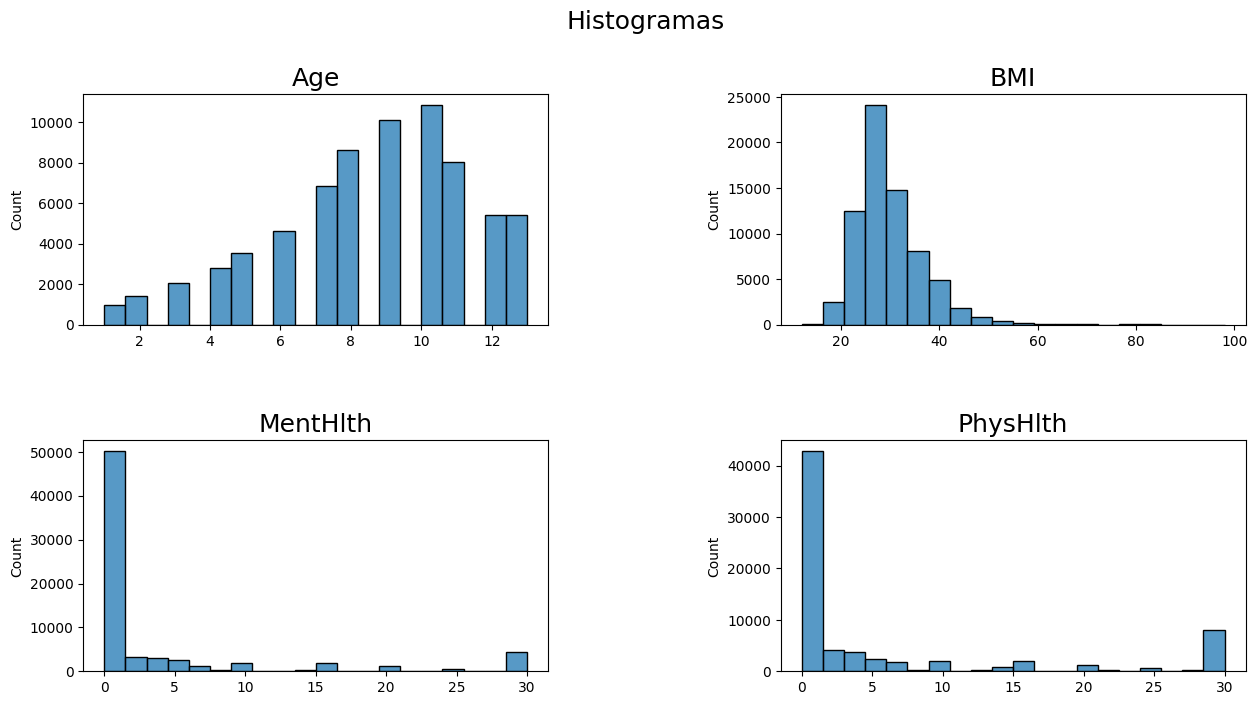

In [ ]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
cols=2
plt.suptitle("Histogramas", fontsize=18, y=0.95)

for n, var in enumerate(num_vars(X)):
    ax = plt.subplot(len(num_vars(X))//cols+1, cols, n + 1)
    sns.histplot(data=df, x=var, bins=20, ax=ax)
    ax.set_title(var, fontsize=18)
    ax.set_xlabel("")

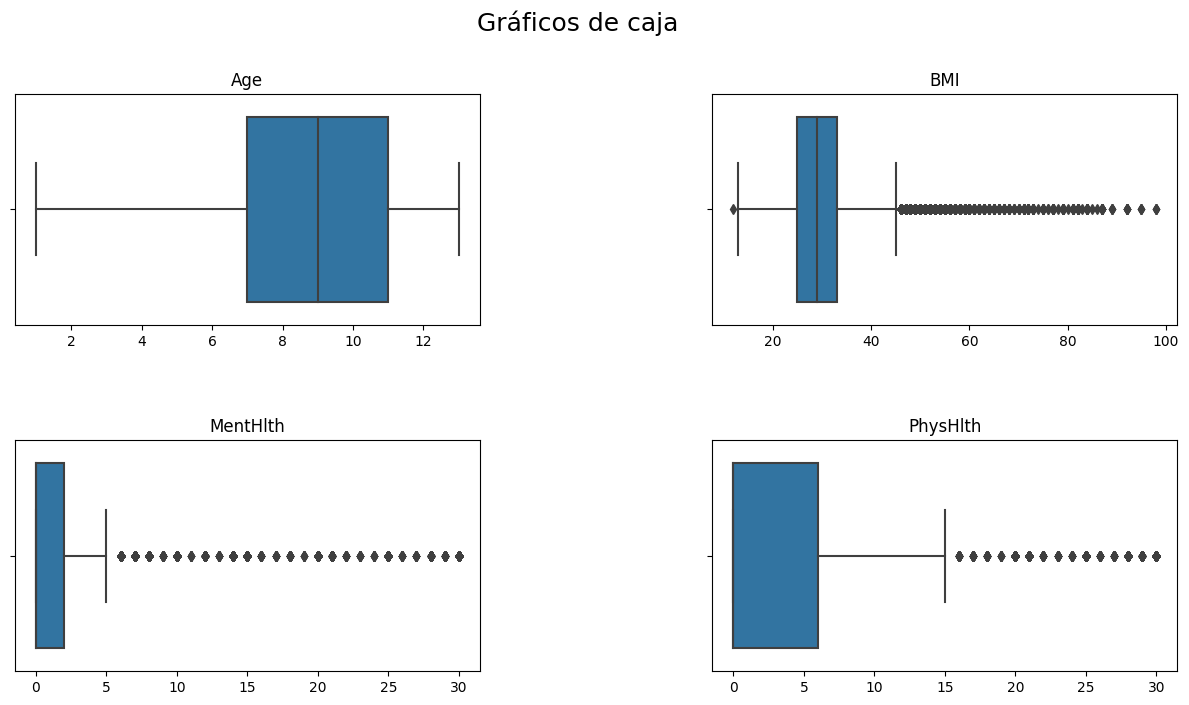

In [ ]:
%%capture --no-display
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
cols=2
plt.suptitle("Gráficos de caja", fontsize=18, y=0.95)

for n, var in enumerate(num_vars(X)):
    ax = plt.subplot(len(num_vars(X))//cols+1, cols, n + 1)
    sns.boxplot(data=df, x=var, ax=ax)
    ax.set_title(var)
    ax.set_xlabel("")

## Análisis univariado de variables categoricas

In [ ]:
freq_tbl(df)

   Sex  frequency  percentage  cumulative_perc
0  0.0      38386    0.543003         0.543003
1  1.0      32306    0.456997         1.000000

----------------------------------------------------------------

  HighChol  frequency  percentage  cumulative_perc
0      1.0      37163    0.525703         0.525703
1      0.0      33529    0.474297         1.000000

----------------------------------------------------------------

  CholCheck  frequency  percentage  cumulative_perc
0       1.0      68943    0.975259         0.975259
1       0.0       1749    0.024741         1.000000

----------------------------------------------------------------

  Smoker  frequency  percentage  cumulative_perc
0    0.0      37094    0.524727         0.524727
1    1.0      33598    0.475273         1.000000

----------------------------------------------------------------

  HeartDiseaseorAttack  frequency  percentage  cumulative_perc
0                  0.0      60243     0.85219          0.85219
1        

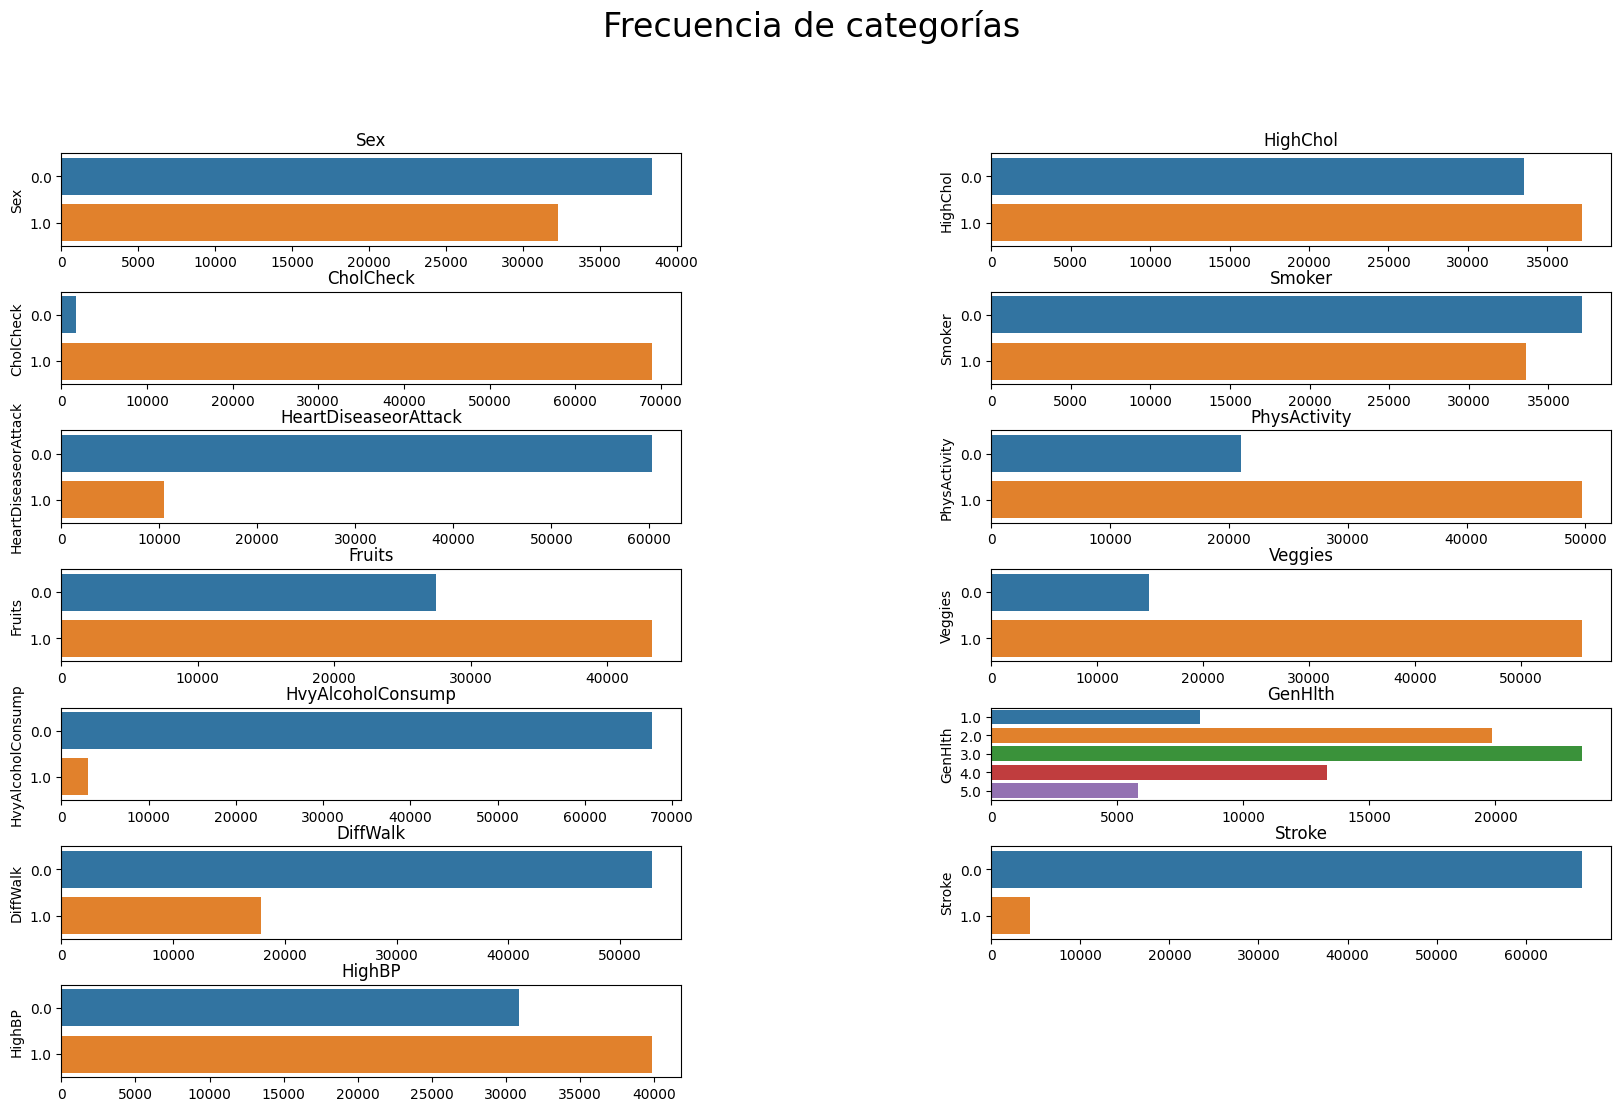

In [ ]:
%%capture --no-display
plt.figure(figsize=(20, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
cols=2
plt.suptitle("Frecuencia de categorías", fontsize=24, y=1)

for n, var in enumerate(cat_vars(X)):
    freq = freq_tbl(df[var])
    ax = plt.subplot(len(cat_vars(X))//cols+1, cols, n + 1)
    sns.barplot(x=freq["frequency"],y=freq[var], ax=ax)
    ax.set_title(var)
    ax.set_xlabel("")

## Análisis bivariado

### Análisis de correlación por pares

In [ ]:
from funpymodeling.exploratory import corr_pair

In [ ]:
res=corr_pair(df)
res_target_ordered=res[res['v2']==objetivo].sort_values('R2', ascending=False)

/usr/local/lib/python3.10/site-packages/funpymodeling/exploratory.py:75: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  d_cor=data2.corr(method)


### Variables relevantes  (R2>=0.05)

In [ ]:
vars_relevantes=res_target_ordered[res_target_ordered['R2']>=0.05]["v1"].tolist()
print("Variables relevantes:", vars_relevantes)
res_target_ordered[res_target_ordered['R2']>=0.05]

Variables relevantes: ['BMI', 'Age']


,v1,v2,R,R2
21,BMI,Diabetes,0.293373,0.086068
20,Age,Diabetes,0.278738,0.077695


### Variables menos relevantes (R2<0.05)

In [ ]:
vars_menos_relevantes=res_target_ordered[res_target_ordered['R2']<0.05]["v1"].tolist()
print("Variables menos relevantes:\n", vars_menos_relevantes)
res_target_ordered[res_target_ordered['R2']<0.05]

Variables menos relevantes:
 ['PhysHlth', 'MentHlth']


,v1,v2,R,R2
23,PhysHlth,Diabetes,0.213081,0.045404
22,MentHlth,Diabetes,0.087029,0.007574


### Correlación

/var/folders/01/t3bg0l4d4h5f95575m0p04jm0000gn/T/ipykernel_12345/1630701239.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


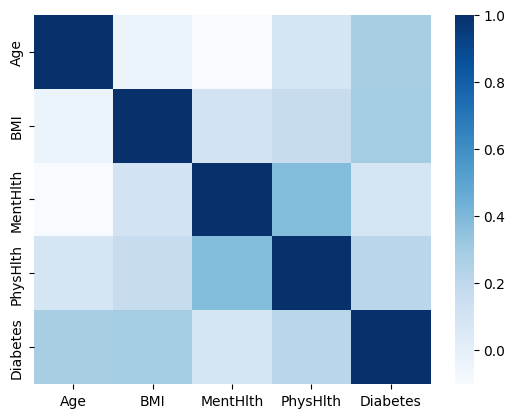

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap="Blues")
plt.show()

### Gráfico "pairplot"

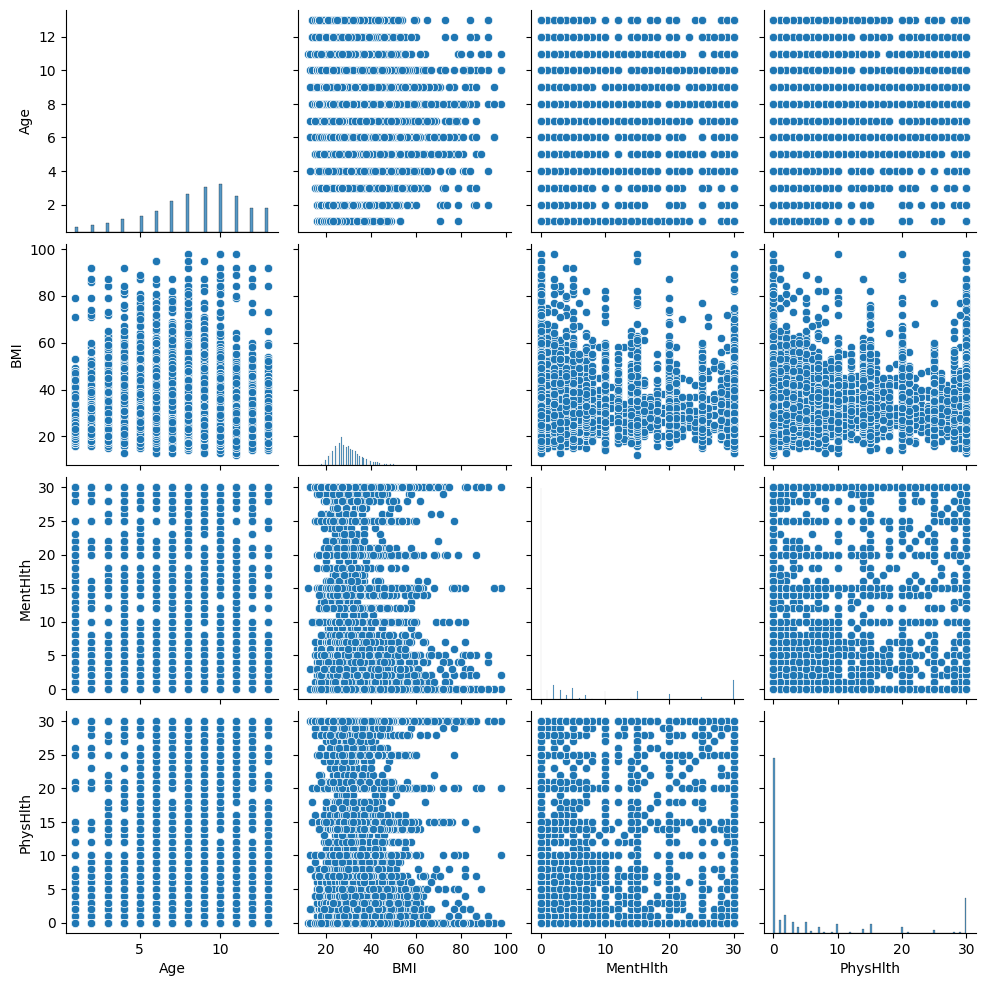

In [ ]:
sns.pairplot(X)
plt.show()

/usr/local/lib/python3.10/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves
/usr/local/lib/python3.10/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves
/usr/local/lib/python3.10/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.

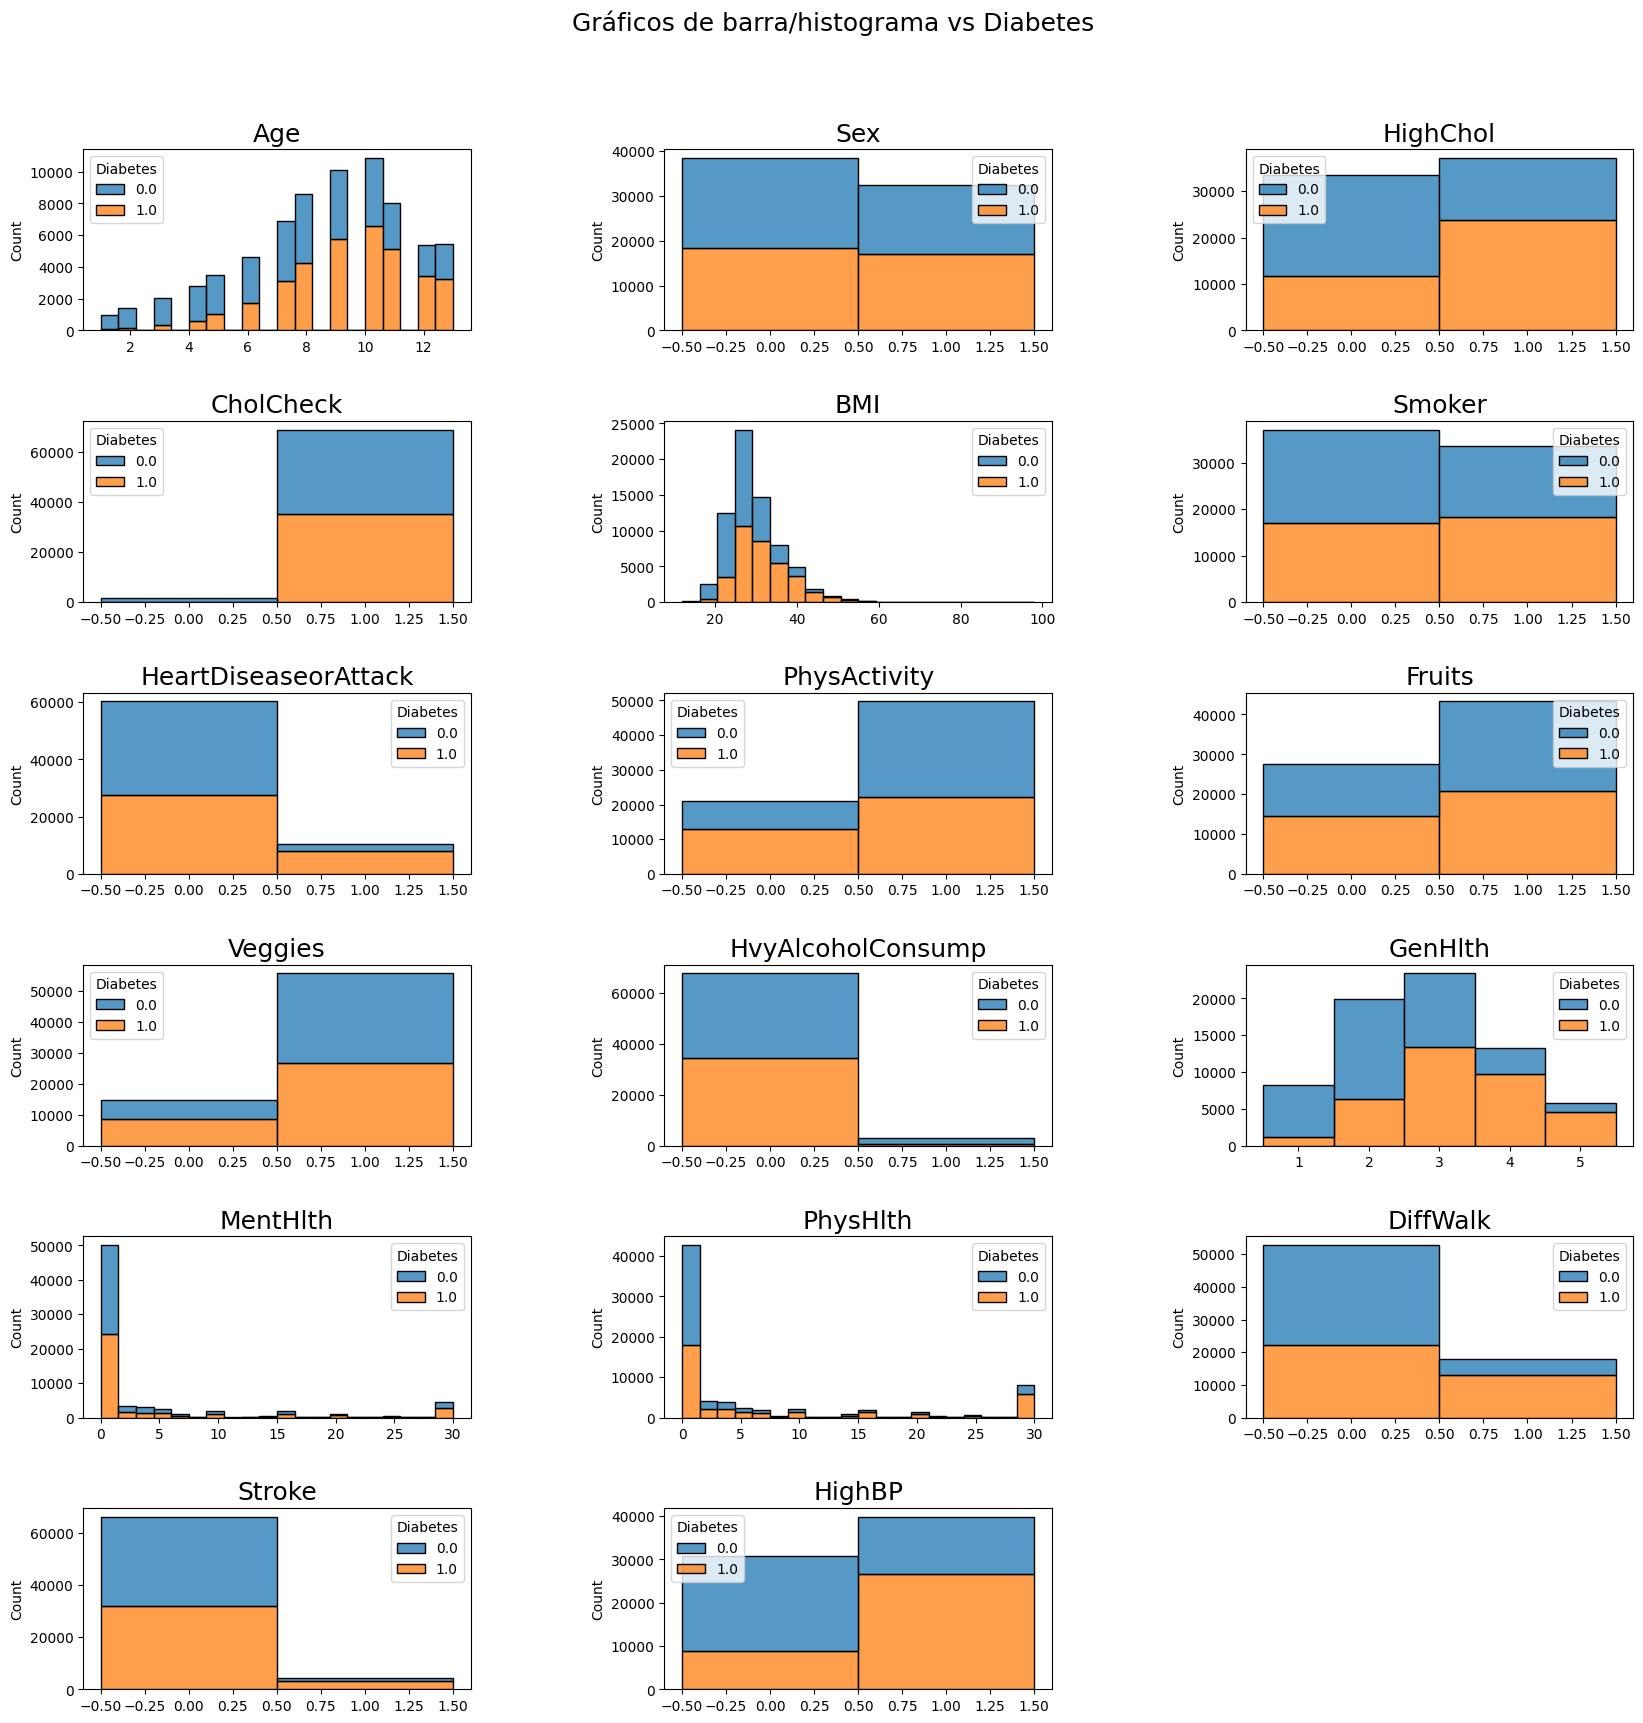

In [ ]:
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
cols=3
plt.suptitle("Gráficos de barra/histograma vs {}".format(objetivo), fontsize=18, y=0.95)

for n, var in enumerate(X.columns):
    ax = plt.subplot(len(X.columns)//cols+1, cols, n + 1)
    sns.histplot(data=df, x=var, hue=objetivo,bins=20, multiple="stack", ax=ax)
    ax.set_title(var, fontsize=18)
    ax.set_xlabel("")

# Preparación de Datos

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Particionar los datos en 80% para entrenamiento y 20% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234, shuffle=True, stratify=y)

In [ ]:
numeric_features = num_vars(X)

# Se estandarizan las variables numericas (z-score)
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

# Se codifican en dummies las variables categoricas
categorical_features = cat_vars(X)
categorical_transformer = OneHotEncoder(drop="if_binary", handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Modelado

In [ ]:
%%capture --no-display

!pip install xgboost
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
%%capture --no-display

# Clasificador
pipeline = Pipeline(
    #steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
    steps=[("preprocessor", preprocessor), ("classifier", xgb.XGBClassifier() )]
)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'BMI', 'MentHlth', 'PhysHlth'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  Index(['Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoh...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                               random_state=0, ...))])

In [ ]:
# Modelo Base
pipeline.score(X_test, y_test)

0.7518212037626424

In [ ]:
pipeline.get_params().keys()
base_pipe=pipeline

In [ ]:
%%capture --no-display


parameters = {
    'classifier__max_depth': range (2, 5, 1),
    'classifier__learning_rate': [0.1, 0.01, 0.05]
}

grid_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True,
    random_state = 1234
)

grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['Age', 'BMI', 'MentHlth', 'PhysHlth'], dtype='object')),
                                                                              ('cat',
                                                                               OneHotEncoder(drop='if_binary',
                                                                                             handle_unknown='ignore'),
                                                                               Index(['Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack',
       'PhysActi...
                                                            max_cat_to_onehot=4,
                                                            max_delta_step=0,
                                                            max_depth=6,
                                                            max_leaves=0,
                                                            min_child_weight=1,
                                                            missing=nan,
                                                            monotone_constraints='()',
                                                            n_estimators=100,
                                                            n_jobs=0,
                                                            num_parallel_tree=1,
                                                            predictor='auto',
                                                            random_state=0, ...))]),
                   n_jobs=10,
                   param_distributions={'classifier__learning_rate': [0.1, 0.01,
                                                                      0.05],
                                        'classifier__max_depth': range(2, 5)},
                   random_state=1234, scoring='roc_auc', verbose=True)

In [ ]:
pipeline = grid_search.best_estimator_

# Evaluación

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
threshold = 0.5
y_probs = pipeline.predict_proba(X_test)[:,1]
y_preds = np.abs(np.ceil(y_probs-threshold))

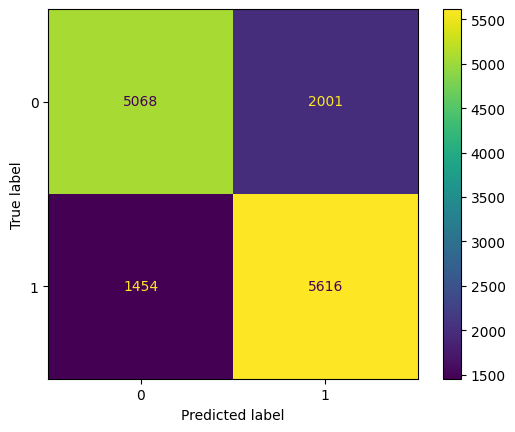

In [ ]:
# Matriz de confusion

cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75      7069
         1.0       0.74      0.79      0.76      7070

    accuracy                           0.76     14139
   macro avg       0.76      0.76      0.76     14139
weighted avg       0.76      0.76      0.76     14139



In [ ]:
# AUC
auc = roc_auc_score(y_test, y_probs)
print('ROC AUC=%.3f' % (auc))

ROC AUC=0.832


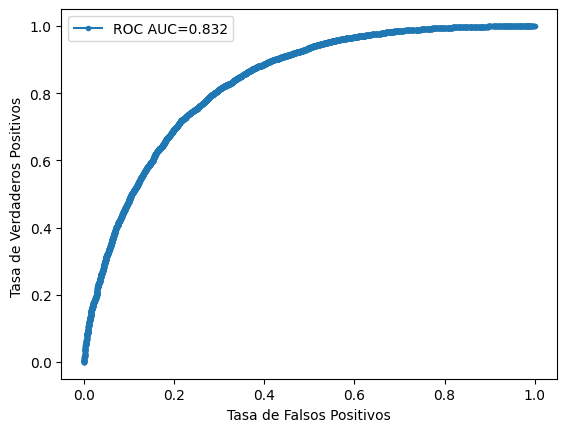

In [ ]:
# Curva ROC
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_probs)
plt.plot(lr_fpr, lr_tpr, marker='.', label='ROC AUC={:.3f}'.format(auc))
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos ')
plt.legend()
plt.show()

In [ ]:
# Guardar el pipeline
import pickle
file_name=data_url.split("/")[-1]
pipeline_file_name=file_name.replace(".csv","_pipeline_pkl")

with open(pipeline_file_name, 'wb') as files:
    pickle.dump(pipeline, files)
    
# Guardar datasets particionados en entrenamiento y prueba
train_file_name=file_name.replace(".csv","_train.csv")
test_file_name=file_name.replace(".csv","_test.csv")

df_train=X_train.copy()
df_train[objetivo]=y_train
df_train.to_csv(train_file_name, index=False)

df_test=X_test.copy()
df_test[objetivo]=y_test
df_test.to_csv(test_file_name, index=False)

# Despliegue/Implantación o Puesta de Valor
Se recupera el **pipeline** que contiene el preproceso de datos y modelo predictivo y se invoca el metodo **predict** con los datos de evaluación, a los que también previamiente transforma en el preproceso de datos. Este método puede ser también expuesto en una **REST API** usando, por ejemplo los frameworks de Python **Flack** o **FastAPI** 

In [ ]:
%%capture --no-display
# Se carga el pipeline que contiene el preproceso de datos y modelo predictivo
with open(pipeline_file_name , 'rb') as f:
    pipeline = pickle.load(f)

In [ ]:
# Datos para evaluar
df_test=pd.read_csv(test_file_name)
objetivo=df_test.columns[-1]
y_test=df_test[objetivo].tolist()
X_test=df_test.drop(columns=objetivo)

In [ ]:
# Hacer predicciones
threshold = 0.5
y_probs = pipeline.predict_proba(X_test)[:,1]
y_preds = np.abs(np.ceil(y_probs-threshold))

In [ ]:
# Visualizar datos junto con predicciones
df_test_preds=X_test.copy()
df_test_preds[objetivo]=y_test
df_test_preds["predi"]=y_preds
df_test_preds["proba"]=y_probs
df_test_preds

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes,predi,proba
0,9.0,0.0,1.0,1.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.466572
1,5.0,1.0,1.0,1.0,42.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,0.0,30.0,0.0,0.0,1.0,1.0,1.0,0.855083
2,11.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.291919
3,11.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.274775
4,1.0,1.0,0.0,1.0,22.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14134,2.0,0.0,0.0,1.0,31.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057040
14135,7.0,0.0,0.0,1.0,33.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,5.0,3.0,0.0,0.0,1.0,0.0,1.0,0.573447
14136,2.0,0.0,0.0,1.0,27.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073361
14137,13.0,1.0,1.0,1.0,28.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.753250
